2024-05-22 13:45:34.574879: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


   Deg  Mo    GO  CO  CR    P1  PW       T3P  T1  Ready  Temps
0    0   2  52.6  34  36  1.02  43  392.4298  39      1   5571
1    0   2  52.4  33  36  0.98  43  385.4558  39      1   5572
2    0   2  51.4  34  36  1.02  43  392.4298  40      1   5573
3    0   2  51.3  33  36  1.00  42  385.4558  41      1   5574
4    0   2  53.5  35  38  1.02  45  399.8960  41      1   5575
Epoch 1/30


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1057/1057 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0380 - val_loss: 0.0101
Epoch 2/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0100 - val_loss: 0.0086
Epoch 3/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 4/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 5/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 6/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 7/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 8/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 9/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0081 - val_loss: 0.0084
Epoch 10/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0080 - val_loss: 0.0083
Epoch 11/30
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0080 - val_loss: 0.0082
Epoch 12/30
1057/1057 ━━━━━━━━━━━━━━━━━━━

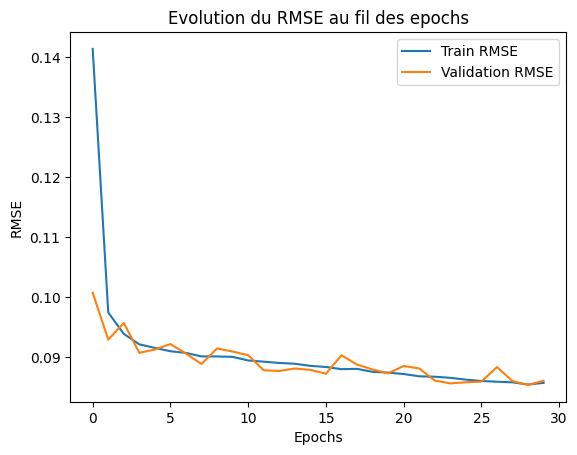

453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error (MSE): 0.007406081167843865
Root Mean Squared Error (RMSE): 0.08605859148187277
REQMN (Normalized RMSE): 0.1619042616893482
R-squared (Coefficient of Determination): 0.8281644663003882


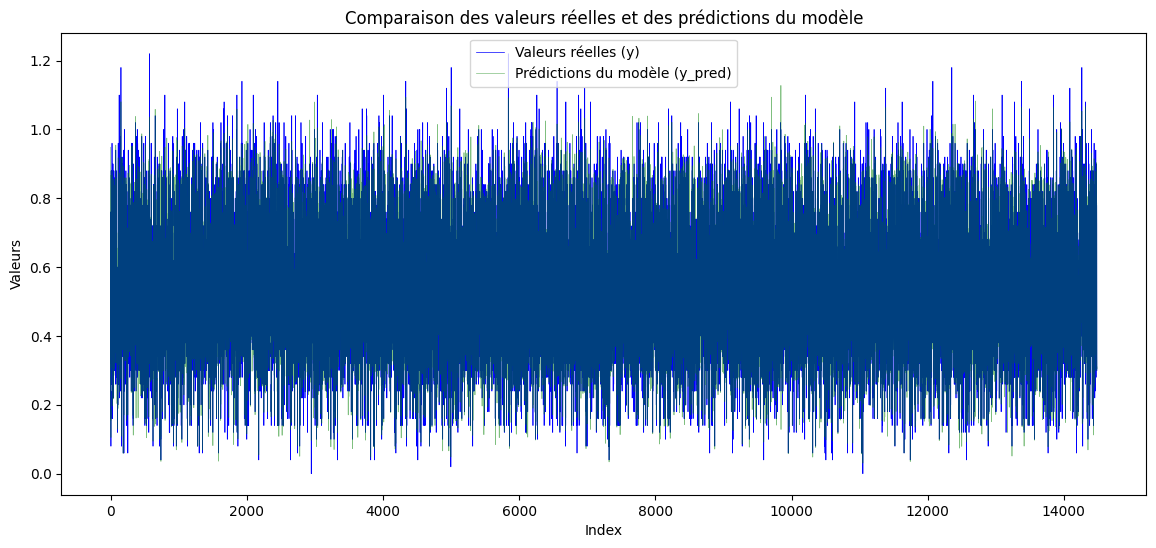

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Chargement des données
file_path = '/Users/benjamincordebar/Desktop/2A/S8/EP/Projet/EP/donnees_propres_2.xlsx'

try:
    data = pd.read_excel(file_path)
    print(data.head())
except Exception as e:
    print("Erreur lors du chargement du fichier:", e)

features = data[['CO', 'Mo', 'CR', 'Deg', 'Temps']]
target = data['P1']

def needs_normalization(data, expected_min=0, expected_max=1):
    actual_min, actual_max = np.min(data), np.max(data)
    return actual_min < expected_min or actual_max > expected_max

if needs_normalization(features):
    scaler = MinMaxScaler(feature_range=(0, 1))
    features = scaler.fit_transform(features)
else:
    features = features.values

def create_sequences(features, target, sequence_length):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:(i + sequence_length)])
        y.append(target[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5
X, y = create_sequences(features, target, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, X_train.shape[2]), return_sequences=True))
model.add(LeakyReLU(alpha=0.01))
model.add(LSTM(50))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Enregistrement de l'historique d'entraînement
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Tracer le RMSE (loss)
plt.plot(np.sqrt(history.history['loss']), label='Train RMSE')
plt.plot(np.sqrt(history.history['val_loss']), label='Validation RMSE')
plt.title('Evolution du RMSE au fil des epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

predictions = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mean_y = np.mean(y_test)
reqmn = rmse / mean_y  # Calcul du REQMN

r_squared = r2_score(y_test, predictions)

# Affichage des résultats
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("REQMN (Normalized RMSE):", reqmn)
print("R-squared (Coefficient of Determination):", r_squared)

# Créer un indice pour l'axe x
indices = np.arange(len(y_test))

# Vérifier que les dimensions correspondent
if len(indices) != len(predictions):
    raise ValueError("Les dimensions de 'indices' et 'predictions' doivent correspondre")

# Tracer les valeurs réelles en bleu
plt.figure(figsize=(14, 6))  # Ajustez la taille du graphique selon vos besoins
plt.plot(indices, y_test, color='blue', label='Valeurs réelles (y)', linewidth=0.5)

# Tracer les prédictions du modèle en vert avec transparence
plt.plot(indices, predictions, color='green', alpha=0.5, label='Prédictions du modèle (y_pred)', linewidth=0.5)

# Ajouter des titres et des légendes
plt.title('Comparaison des valeurs réelles et des prédictions du modèle')
plt.xlabel('Index')
plt.ylabel('Valeurs')
plt.legend()

# Afficher le graphique
plt.show()


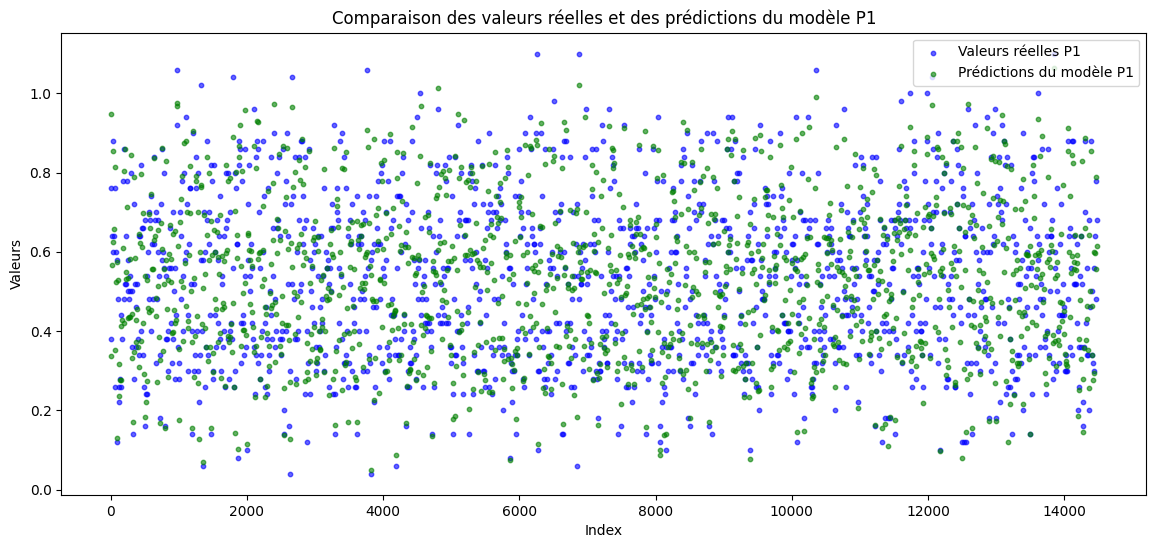

In [8]:
# Échantillonnage des données pour affichage
sample_rate = 10  # Ajustez ce taux pour afficher moins de points
sampled_indices = np.arange(len(y_test))[::sample_rate]
sampled_y_test = y_test[::sample_rate]
sampled_predictions = predictions[::sample_rate]

# Tracer les valeurs réelles et les prédictions avec des points
plt.figure(figsize=(14, 6))
plt.scatter(sampled_indices, sampled_y_test, color='blue', label='Valeurs réelles P1', s=10, alpha=0.6)
plt.scatter(sampled_indices, sampled_predictions, color='green', alpha=0.6, label='Prédictions du modèle P1', s=10)

# Ajouter des titres et des légendes
plt.title('Comparaison des valeurs réelles et des prédictions du modèle P1')
plt.xlabel('Index')
plt.ylabel('Valeurs')
plt.legend()

# Afficher le graphique
plt.show()

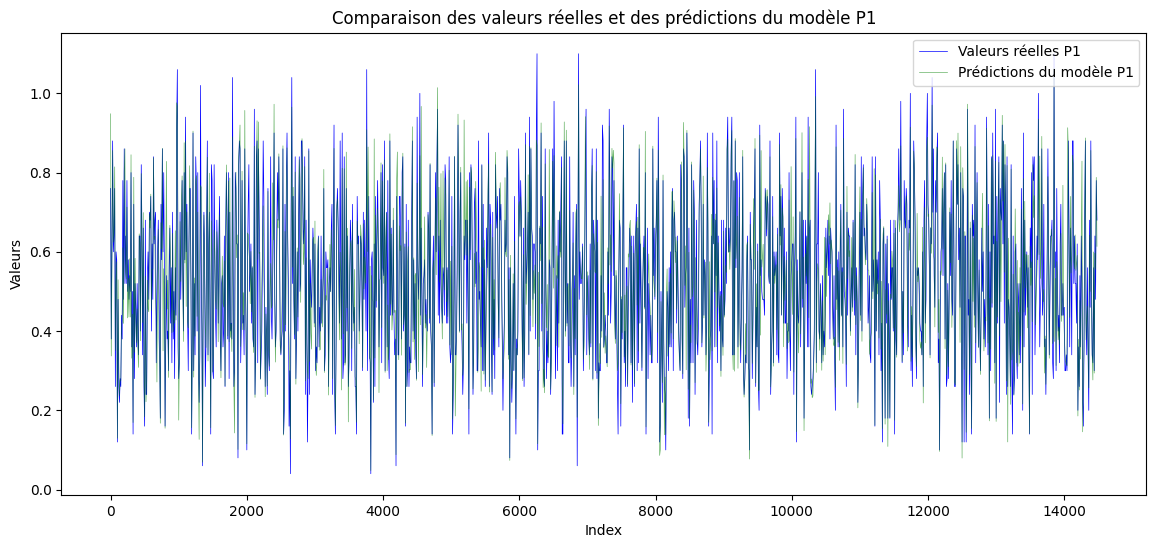

In [9]:
# Créer un indice pour l'axe x
indices = np.arange(len(y_test))

# Vérifier que les dimensions correspondent
if len(indices) != len(predictions):
    raise ValueError("Les dimensions de 'indices' et 'predictions' doivent correspondre")

# Échantillonnage des données pour affichage
sample_rate = 10  # Ajustez ce taux pour afficher moins de points
sampled_indices = indices[::sample_rate]
sampled_y_test = y_test[::sample_rate]
sampled_predictions = predictions[::sample_rate]

# Tracer les valeurs réelles et les prédictions avec des lignes
plt.figure(figsize=(14, 6))
plt.plot(sampled_indices, sampled_y_test, color='blue', label='Valeurs réelles P1', linewidth=0.5)
plt.plot(sampled_indices, sampled_predictions, color='green', alpha=0.6, label='Prédictions du modèle P1', linewidth=0.5)

# Ajouter des titres et des légendes
plt.title('Comparaison des valeurs réelles et des prédictions du modèle P1')
plt.xlabel('Index')
plt.ylabel('Valeurs')
plt.legend()

# Afficher le graphique
plt.show()